In [165]:
# CUSTOMER CHURN ANALYSIS

# Importing all necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve

In [166]:
# uploading dataset
data=pd.read_csv(r"C:\Users\donad\OneDrive\Desktop\BSBI\predictive\project\churn.csv")

In [167]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Cr,Exited
0,1,15634602,Hargrave,619.0,France,Female,42,2,0.00,1.0,1,1,101348.88,1,1
1,2,15647311,Hill,608.0,Spain,Female,41,1,83807.86,1.0,0,1,112542.58,3,0
2,3,15619304,Onio,502.0,France,Female,42,8,159660.80,3.0,1,0,113931.57,3,1
3,4,15701354,Boni,699.0,France,Female,39,1,0.00,2.0,0,0,93826.63,1,0
4,5,15737888,Mitchell,850.0,Spain,Female,43,2,125510.82,1.0,1,1,79084.10,4,0


In [168]:
# printing the shape of dataset
data.shape

(10000, 15)

In [169]:
# Dropping unnecessary columns
data.drop(['Surname','RowNumber','CustomerId'],axis=1,inplace=True)
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Cr,Exited
0,619.0,France,Female,42,2,0.00,1.0,1,1,101348.88,1,1
1,608.0,Spain,Female,41,1,83807.86,1.0,0,1,112542.58,3,0
2,502.0,France,Female,42,8,159660.80,3.0,1,0,113931.57,3,1
3,699.0,France,Female,39,1,0.00,2.0,0,0,93826.63,1,0
4,850.0,Spain,Female,43,2,125510.82,1.0,1,1,79084.10,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771.0,France,Male,39,5,0.00,2.0,1,0,96270.64,3,0
9996,516.0,France,Male,35,10,57369.61,1.0,1,1,101699.77,3,0
9997,709.0,France,Female,36,7,0.00,1.0,0,1,42085.58,4,1
9998,772.0,Germany,Male,42,3,75075.31,NaN,1,0,92888.52,2,1


In [170]:
# display unique values of each column
data.nunique()

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9944
Cr                    5
Exited                2
dtype: int64

In [171]:
# Identify any missing or unexpected values in the gender column since outlier is found in further preprocessing
unexpected_values = data[~data['Gender'].isin(['Male', 'Female'])]
print("Rows with unexpected 'Gender' values:\n", unexpected_values)

Rows with unexpected 'Gender' values:
       CreditScore Geography Gender  Age  Tenure    Balance  NumOfProducts  \
1849        581.0     Spain    NaN   29       8       0.00            2.0   
1852        698.0     Spain    NaN   38      10   95010.92            1.0   
1871        634.0     Spain    NaN   36       2   85996.19            1.0   
1897        673.0     Spain    NaN   37       0       0.00            2.0   
1933        666.0   Germany    NaN   74       7  105102.50            1.0   
...           ...       ...    ...  ...     ...        ...            ...   
9282        619.0     Spain    NaN   34       1       0.00            1.0   
9397        766.0    France    NaN   52       7   92510.90            2.0   
9562        738.0    France    NaN   39       5       0.00            2.0   
9617        591.0   Germany    NaN   35       2   90194.34            2.0   
9683        606.0    France    NaN   32       6       0.00            2.0   

      HasCrCard  IsActiveMember  Est

In [172]:
# Converting NaN to a placeholder
data['Gender'] = data['Gender'].fillna('Unknown')

In [173]:
# encoding categorical data
le=LabelEncoder()
dummy=['Geography','Gender']
for i in dummy:
    data[i]=le.fit_transform(data[i].astype(str))
data    

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Cr,Exited
0,619.0,0,0,42,2,0.00,1.0,1,1,101348.88,1,1
1,608.0,2,0,41,1,83807.86,1.0,0,1,112542.58,3,0
2,502.0,0,0,42,8,159660.80,3.0,1,0,113931.57,3,1
3,699.0,0,0,39,1,0.00,2.0,0,0,93826.63,1,0
4,850.0,2,0,43,2,125510.82,1.0,1,1,79084.10,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771.0,0,1,39,5,0.00,2.0,1,0,96270.64,3,0
9996,516.0,0,1,35,10,57369.61,1.0,1,1,101699.77,3,0
9997,709.0,0,0,36,7,0.00,1.0,0,1,42085.58,4,1
9998,772.0,1,1,42,3,75075.31,NaN,1,0,92888.52,2,1


In [174]:
# Get unique count for each column
data.nunique()    # there are 3 different categories in the gender columnn and this needs fixing.

CreditScore         460
Geography             3
Gender                3
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9944
Cr                    5
Exited                2
dtype: int64

In [175]:
# Converting the encoded placeholder of gender back to NaN
unknown_encoded = le.transform(['Unknown'])[0]
data['Gender'] = data['Gender'].replace(unknown_encoded, np.nan)

In [176]:
# checking null values
data.isnull().sum()

CreditScore        147
Geography            0
Gender              77
Age                  0
Tenure               0
Balance              0
NumOfProducts      233
HasCrCard            0
IsActiveMember       0
EstimatedSalary     55
Cr                   0
Exited               0
dtype: int64

In [177]:
# Filling NaN values of categorical feature with the mode
mode_value = data['Gender'].mode()[0]
data['Gender'] = data['Gender'].fillna(mode_value)

In [178]:
# filling the null values with calculated mean values
data.fillna(data.mean(), inplace=True)
print(data.isnull().sum())

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Cr                 0
Exited             0
dtype: int64


In [179]:
# checking for duplicates
data.duplicated().sum()

0

In [180]:
# Exploratory Data Analysis (EDA)
# Displaying summary statistics
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.567137,95.895457,350.00,585.000,650.567137,716.2500,850.00
Geography,10000.0,0.746300,0.827529,0.00,0.000,0.000000,1.0000,2.00
Gender,10000.0,0.549500,0.497569,0.00,0.000,1.000000,1.0000,1.00
Age,10000.0,38.921800,10.487806,18.00,32.000,37.000000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.000,5.000000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.000,97198.540000,127644.2400,250898.09
NumOfProducts,10000.0,1.530460,0.575241,1.00,1.000,1.530460,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.000,1.000000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.000,1.000000,1.0000,1.00
EstimatedSalary,10000.0,100128.095817,57312.154169,11.58,51464.455,100128.095817,149006.0475,199992.48


In [181]:
# Get unique count for each column
data.nunique()

CreditScore         461
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         5
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9945
Cr                    5
Exited                2
dtype: int64

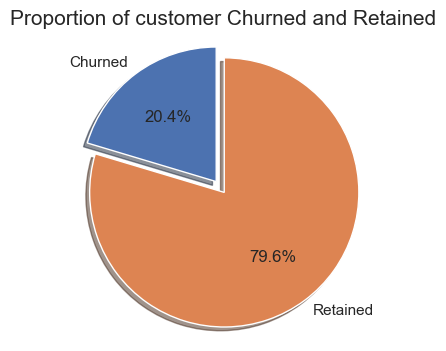

In [182]:
# visual representation of customer churn
labels = 'Churned', 'Retained'
sizes = [data.Exited[data['Exited']==1].count(), data.Exited[data['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(5, 4))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer Churned and Retained", size = 15)
plt.show()

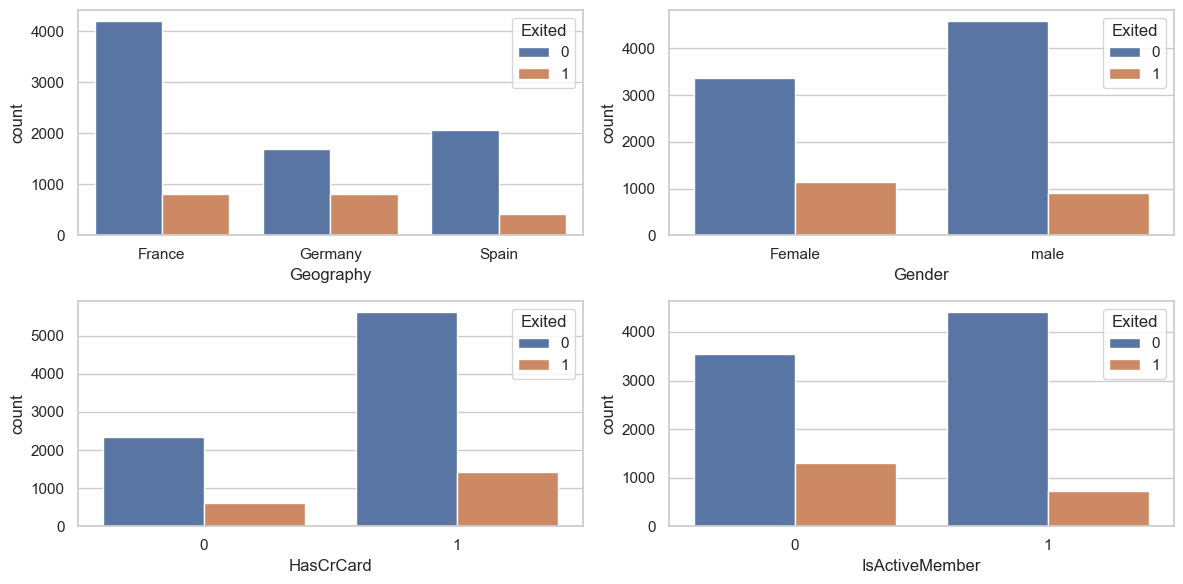

In [183]:
# relation with categorical variables
country_names = ['France', 'Germany', 'Spain']
gender_labels = ['Female', 'male']

fig, axarr = plt.subplots(2, 2, figsize=(12, 6))
sns.countplot(x='Geography', hue = 'Exited',data = data, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = data, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = data, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = data, ax=axarr[1][1])
axarr[0][0].set_xticklabels(country_names)
axarr[0][1].set_xticklabels(gender_labels)
plt.tight_layout()
plt.show()

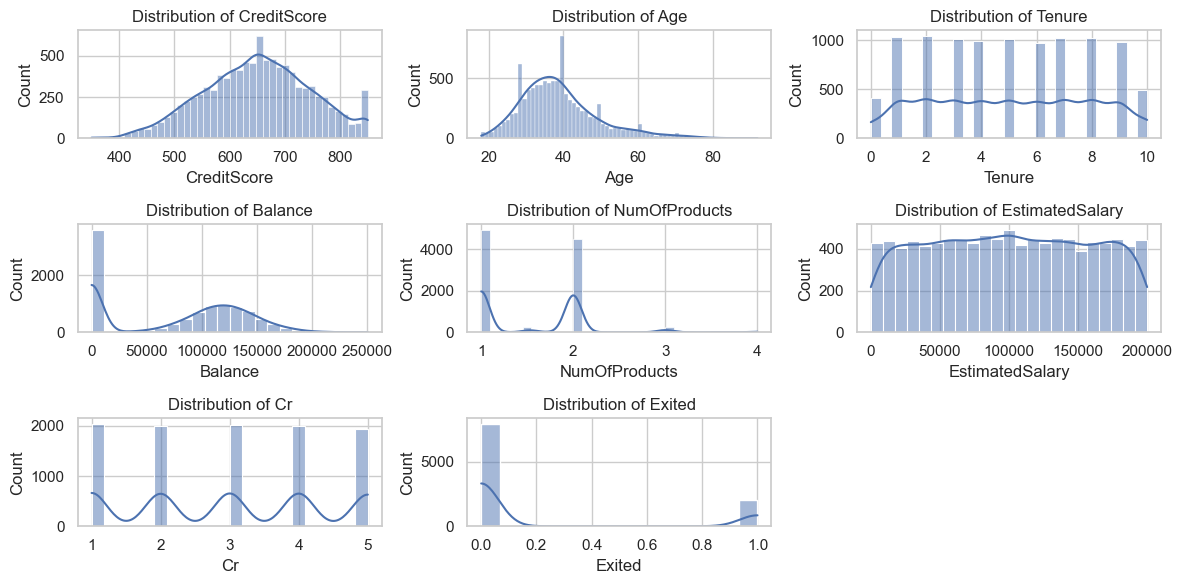

In [184]:
# histogram representation of continuous features
Features = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary','Cr','Exited']
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
for i, feature in enumerate(Features):
    plt.subplot(3, 3, i+1)
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

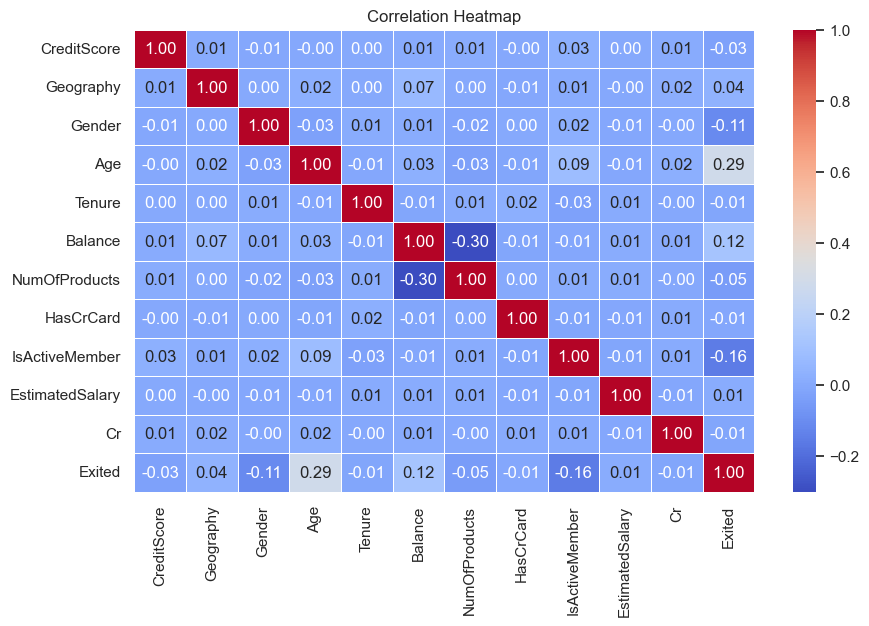

In [185]:
# checking correlation to make sure the dataset is ideal for analysis
corr_matrix = data.corr()

# plotting the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [186]:
# splitting dataset to training and testing
train,test=train_test_split(data,test_size=0.3,random_state=42)

In [187]:
trainx=train.iloc[:,0:-1]
trainy=train.iloc[:,-1]
testx=test.iloc[:,0:-1]
testy=test.iloc[:,-1]

In [188]:
# K-nearest neighbour model building
modelknn=KNC(n_neighbors=3)
modelknn.fit(trainx,trainy)
predknn=modelknn.predict(testx)

In [189]:
# accuracy for k-nearest neighnor model
accknn=np.mean(predknn==testy)
accknn

0.7406666666666667

In [190]:
# Classification report for KNN
print(classification_report(testy, predknn))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85      2416
           1       0.22      0.13      0.16       584

    accuracy                           0.74      3000
   macro avg       0.51      0.51      0.50      3000
weighted avg       0.69      0.74      0.71      3000



In [191]:
# Descision tree model building
dt=DTC(criterion='entropy',random_state=42)
modeldt=dt.fit(trainx,trainy).predict(testx)

In [192]:
# accuracy for decision tree model
accdt=np.mean(modeldt==testy)
accdt

0.7943333333333333

In [193]:
# Classification report for decision tree
print(classification_report(testy, modeldt))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87      2416
           1       0.47      0.51      0.49       584

    accuracy                           0.79      3000
   macro avg       0.68      0.69      0.68      3000
weighted avg       0.80      0.79      0.80      3000



In [194]:
# random forest model building
rf=RFC(n_jobs=12,n_estimators=100,oob_score=True,criterion='entropy',random_state=42)
predrf=rf.fit(trainx,trainy).predict(testx)

In [195]:
# accuracy for random forest model
accrf=np.mean(predrf==testy)
accrf

0.868

In [196]:
# Classification report for Random Forest
print(classification_report(testy, predrf))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2416
           1       0.78      0.45      0.57       584

    accuracy                           0.87      3000
   macro avg       0.83      0.71      0.75      3000
weighted avg       0.86      0.87      0.85      3000



In [197]:
# list of models with their accuracies
models = pd.DataFrame({'Model Names':['K-Nearest Neighbours','Decision Tree','Random Forest'],
                       'Accuracy':[accknn,accdt,accrf]})
models

,Model Names,Accuracy
0,K-Nearest Neighbours,0.740667
1,Decision Tree,0.794333
2,Random Forest,0.868000


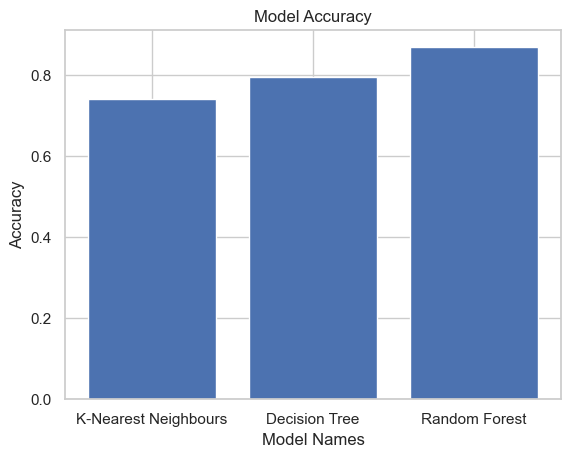

In [198]:
# Plotting model accuracies
plt.bar(models['Model Names'], models['Accuracy'])
plt.xlabel('Model Names')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.show()

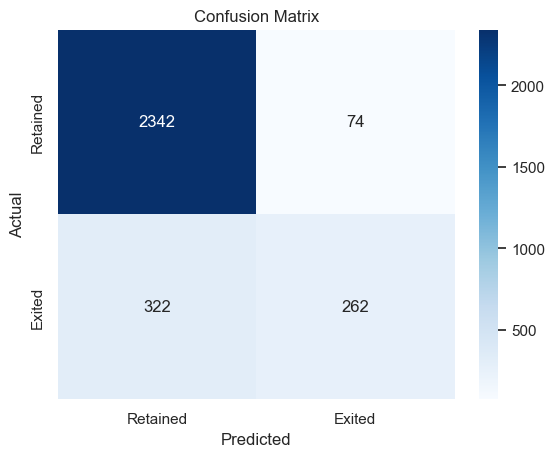

In [199]:
# Confusion Matrix for Random Forest
cm = confusion_matrix(testy, predrf)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Retained", "Exited"], yticklabels=["Retained", "Exited"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

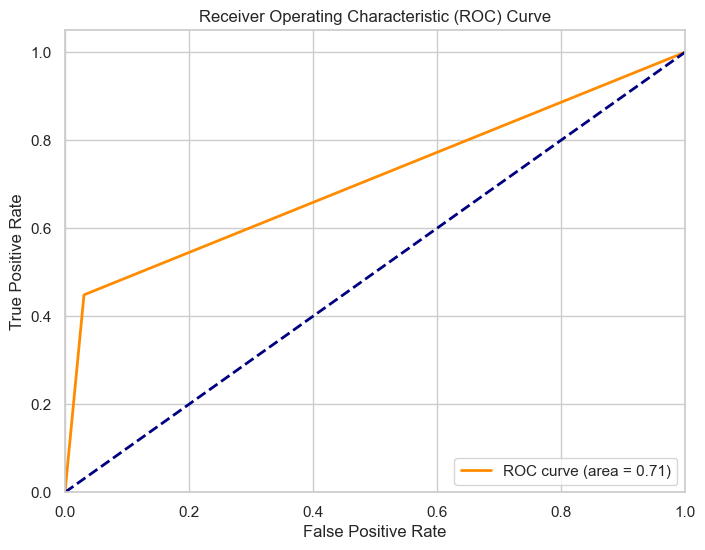

In [200]:
# ROC curve for Random Forest
fpr, tpr, _ = roc_curve(testy, predrf)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


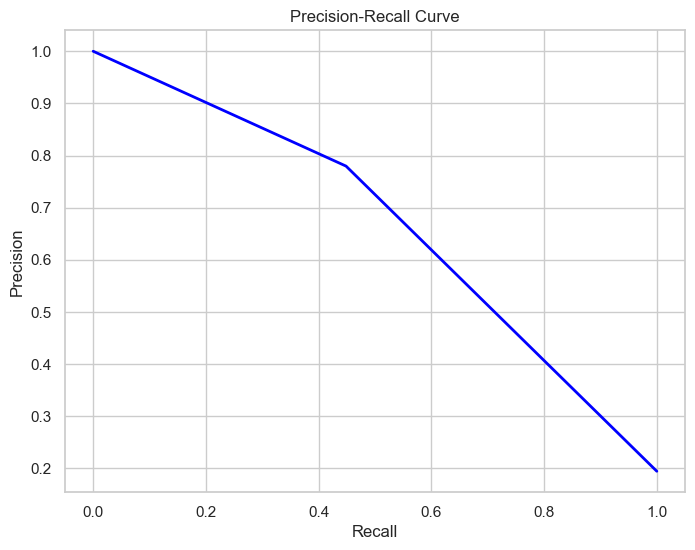

In [201]:
# Plotting precision-recall curve for Random Forest
precision, recall, _ = precision_recall_curve(testy, predrf)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [202]:
import pickle

# Saving the Random Forest model using pickle
with open('customer_churn.pkl', 'wb') as file:
    pickle.dump(predrf, file)